In [1]:
B_HIGH_FILENAME = "B_high.txt"
B_LOW_FILENAME = "B_low.txt"

MAIN_RESULTS_FILENAME = "COMSOL Main Results.txt"

MAGNETIC_PROFILE_FILENAME = "COMSOL Magnetic Profile.txt"

COMSOL_PARAMETER_FILENAME = "params.txt"

In [2]:
import numpy as np

Load the high and low field data:

In [63]:
B_h = np.loadtxt(B_HIGH_FILENAME,skiprows=9)

In [64]:
B_l = np.loadtxt(B_LOW_FILENAME,skiprows=9)

Join the above data to build up the first quadrant of the air gap

In [7]:
B_1q = np.concatenate((B_h,B_l),axis=0)

In [8]:
B_1q

array([[  3.70795097e-02,   3.35426589e-02,   6.79921079e-01],
       [  3.88101783e-02,   3.15241187e-02,   8.02806723e-01],
       [  3.95096690e-02,   3.37468663e-02,   6.47266282e-01],
       [  3.53553391e-02,   3.53553391e-02,   5.82056154e-01],
       [  3.78867932e-02,   3.51989470e-02,   5.09235881e-01],
       [  3.72110937e-02,   3.72110937e-02,   3.29931839e-01],
       [  4.04312050e-02,   2.94162823e-02,   9.44589476e-01],
       [  4.11858051e-02,   3.17140143e-02,   8.09658077e-01],
       [  3.94954360e-02,   3.94954360e-02,   3.52431996e-01],
       [  4.00845782e-02,   3.65050147e-02,   4.88238265e-01],
       [  4.19378820e-02,   2.72252467e-02,   1.10720379e+00],
       [  4.27871945e-02,   2.96220759e-02,   9.65614170e-01],
       [  4.33012702e-02,   2.50000000e-02,   1.47531505e+00],
       [  4.42803124e-02,   2.74620630e-02,   1.12856273e+00],
       [  4.20163770e-02,   4.20163770e-02,   4.05626740e-01],
       [  4.26802772e-02,   3.89354104e-02,   5.1067600

Calculate a vector of angular values for the first quadrant

In [9]:
import teslamax

In [16]:
case_series = teslamax.get_comsol_parameters_series()


n_phi_points = 100

R_g = case_series['R_g']
R_i = case_series['R_i']
R_s = case_series['R_s']
R_o = case_series['R_o']


# create ranges for phi and r
phi_min = 0.0
phi_max = np.pi/2
    
phi_vector = np.linspace(phi_min,phi_max,n_phi_points)

# slightly offset the boundaries to avoid numerical problems at the interfaces
r_min = R_o * 1.01
r_max = R_g * 0.99
n_r_points = 5

r_vector = np.linspace(r_min,r_max,n_r_points)

In [17]:
phi_vector

array([ 0.        ,  0.01586663,  0.03173326,  0.04759989,  0.06346652,
        0.07933315,  0.09519978,  0.11106641,  0.12693304,  0.14279967,
        0.1586663 ,  0.17453293,  0.19039955,  0.20626618,  0.22213281,
        0.23799944,  0.25386607,  0.2697327 ,  0.28559933,  0.30146596,
        0.31733259,  0.33319922,  0.34906585,  0.36493248,  0.38079911,
        0.39666574,  0.41253237,  0.428399  ,  0.44426563,  0.46013226,
        0.47599889,  0.49186552,  0.50773215,  0.52359878,  0.53946541,
        0.55533203,  0.57119866,  0.58706529,  0.60293192,  0.61879855,
        0.63466518,  0.65053181,  0.66639844,  0.68226507,  0.6981317 ,
        0.71399833,  0.72986496,  0.74573159,  0.76159822,  0.77746485,
        0.79333148,  0.80919811,  0.82506474,  0.84093137,  0.856798  ,
        0.87266463,  0.88853126,  0.90439789,  0.92026451,  0.93613114,
        0.95199777,  0.9678644 ,  0.98373103,  0.99959766,  1.01546429,
        1.03133092,  1.04719755,  1.06306418,  1.07893081,  1.09

In [18]:
r_vector

array([ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693])

Calculate a matrix of $(r,\phi)$ points  along the first quadrant where to evaluate the field (in this controlled grid), and interpolate from the previous array (where each row corresponde to a radial chord i.e. a single value of $\phi$)

In [27]:
r_grid, phi_grid = np.meshgrid(r_vector,phi_vector)

In [28]:
r_grid

array([[ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0.0599,  0.0646,  0.0693],
       [ 0.0505,  0.0552,  0

In [29]:
phi_grid

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.01586663,  0.01586663,  0.01586663,  0.01586663,  0.01586663],
       [ 0.03173326,  0.03173326,  0.03173326,  0.03173326,  0.03173326],
       [ 0.04759989,  0.04759989,  0.04759989,  0.04759989,  0.04759989],
       [ 0.06346652,  0.06346652,  0.06346652,  0.06346652,  0.06346652],
       [ 0.07933315,  0.07933315,  0.07933315,  0.07933315,  0.07933315],
       [ 0.09519978,  0.09519978,  0.09519978,  0.09519978,  0.09519978],
       [ 0.11106641,  0.11106641,  0.11106641,  0.11106641,  0.11106641],
       [ 0.12693304,  0.12693304,  0.12693304,  0.12693304,  0.12693304],
       [ 0.14279967,  0.14279967,  0.14279967,  0.14279967,  0.14279967],
       [ 0.1586663 ,  0.1586663 ,  0.1586663 ,  0.1586663 ,  0.1586663 ],
       [ 0.17453293,  0.17453293,  0.17453293,  0.17453293,  0.17453293],
       [ 0.19039955,  0.19039955,  0.19039955,  0.19039955,  0.19039955],
       [ 0.20626618,  0.20626618,  0.2

Calculate the average value along each radial chord

In [65]:
x_grid = r_grid * np.cos(phi_grid)
y_grid = r_grid * np.sin(phi_grid)

In [33]:
from scipy.interpolate import griddata

In [38]:
B_grid = B_1q[:,0:2]

In [39]:
B_values = B_1q[:,2]

In [66]:
B_values

array([  6.79921079e-01,   8.02806723e-01,   6.47266282e-01,
         5.82056154e-01,   5.09235881e-01,   3.29931839e-01,
         9.44589476e-01,   8.09658077e-01,   3.52431996e-01,
         4.88238265e-01,   1.10720379e+00,   9.65614170e-01,
         1.47531505e+00,   1.12856273e+00,   4.05626740e-01,
         5.10676007e-01,   1.43193722e+00,   1.28138719e+00,
         1.40695996e+00,   1.32408589e+00,   1.40817135e+00,
         1.33947750e+00,   1.42339594e+00,   1.34819875e+00,
         1.50222514e+00,   1.34709293e+00,   1.34688253e+00,
         1.31000183e+00,   5.09255009e-01,   5.98790244e-01,
         7.37828132e-01,   7.58608921e-01,   1.24175578e+00,
         1.12904466e+00,   1.12782102e+00,   1.22124681e+00,
         1.98468293e+00,   1.00634316e+00,   9.61636059e-01,
         1.00884598e+00,   5.46555102e-01,   8.76833363e-01,
         1.29250304e+00,   1.19165287e+00,   1.00801609e+00,
         8.59940015e-01,   1.19106636e+00,   1.03673565e+00,
         1.26117996e+00,

In [50]:
from scipy.interpolate import interp2d, SmoothBivariateSpline

In [51]:
fB = SmoothBivariateSpline(x=B_1q[:,0],y=B_1q[:,1],z=B_1q[:,2])

In [67]:
x_grid

array([[  5.05000000e-02,   5.52000000e-02,   5.99000000e-02,
          6.46000000e-02,   6.93000000e-02],
       [  5.04936434e-02,   5.51930518e-02,   5.98924602e-02,
          6.45918686e-02,   6.92912770e-02],
       [  5.04745754e-02,   5.51722091e-02,   5.98698429e-02,
          6.45674766e-02,   6.92651104e-02],
       [  5.04428006e-02,   5.51374771e-02,   5.98321536e-02,
          6.45268301e-02,   6.92215066e-02],
       [  5.03983272e-02,   5.50888645e-02,   5.97794019e-02,
          6.44699393e-02,   6.91604767e-02],
       [  5.03411662e-02,   5.50263836e-02,   5.97116011e-02,
          6.43968185e-02,   6.90820360e-02],
       [  5.02713321e-02,   5.49500501e-02,   5.96287682e-02,
          6.43074862e-02,   6.89862042e-02],
       [  5.01888425e-02,   5.48598832e-02,   5.95309240e-02,
          6.42019648e-02,   6.88730056e-02],
       [  5.00937180e-02,   5.47559057e-02,   5.94180933e-02,
          6.40802809e-02,   6.87424685e-02],
       [  4.99859828e-02,   5.4638143

In [68]:
y_grid

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00080123,  0.0008758 ,  0.00095037,  0.00102494,  0.00109951],
       [ 0.00160226,  0.00175138,  0.0019005 ,  0.00204962,  0.00219875],
       [ 0.00240289,  0.00262652,  0.00285016,  0.00307379,  0.00329743],
       [ 0.00320291,  0.003501  ,  0.00379909,  0.00409719,  0.00439528],
       [ 0.00400212,  0.0043746 ,  0.00474707,  0.00511955,  0.00549202],
       [ 0.00480033,  0.00524709,  0.00569386,  0.00614062,  0.00658738],
       [ 0.00559733,  0.00611827,  0.00663921,  0.00716015,  0.00768109],
       [ 0.00639292,  0.0069879 ,  0.00758289,  0.00817787,  0.00877286],
       [ 0.0071869 ,  0.00785578,  0.00852466,  0.00919354,  0.00986242],
       [ 0.00797907,  0.00872168,  0.00946428,  0.01020689,  0.0109495 ],
       [ 0.00876923,  0.00958538,  0.01040153,  0.01121767,  0.01203382],
       [ 0.00955719,  0.01044667,  0.01133615,  0.01222563,  0.01311511],
       [ 0.01034274,  0.01130533,  0.0

In [75]:
B_radial_values = fB.ev(x_grid,y_grid)

In [80]:
B_profile = np.mean(B_radial_values,axis=1)

In [81]:
B_profile.shape

(100,)

In [82]:
import matplotlib.pyplot as plt

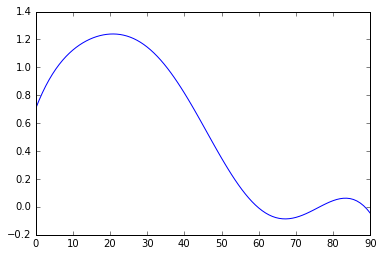

In [86]:
%matplotlib inline

plt.plot(np.rad2deg(phi_vector),B_profile)